In [21]:
import tensorflow as tf


import numpy as np
import matplotlib.pyplot as plt



In [22]:
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))
     


`sport` is a 0-d Tensor
`number` is a 0-d Tensor


In [23]:
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))


`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


In [36]:
### Defining higher-order Tensors ###
params = int(3)
'''TODO: Define a 2-d Tensor'''
matrix = tf.eye(2)


print("`matrix` is a {}-d Tensor with shape: {}".format(tf.rank(matrix).numpy(), tf.shape(matrix)))



`matrix` is a 2-d Tensor with shape: [2 2]


In [40]:
images = tf.zeros(shape=(10, 256, 256,3))
print("`matrix` is a {}-d Tensor with shape: {}".format(tf.rank(images).numpy(), tf.shape(images)))
assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"


`matrix` is a 3-d Tensor with shape: [ 10 256 256]


AssertionError: matrix must be of rank 4

In [34]:
image = tf.zeros([10,10,3])
tf.expand_dims(image, axis=0).shape.as_list()


[1, 10, 10, 3]

In [35]:
tf.expand_dims(image, axis=2).shape.as_list()


[10, 10, 1, 3]

In [41]:
### Defining Tensor computations ###
a = tf.constant(15)
b= tf.constant(62)
# Construct a simple computation function
def func(a,b):
  c = tf.add(a,b)
  d = tf.subtract(b,1)
  e = tf.multiply(c,d)
  return e

print(func(a,b))

tf.Tensor(4697, shape=(), dtype=int32)


In [52]:
class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize parameters: a weight matrix W and bias b
    # Note that parameter initialization is random!
    self.W = self.add_weight("weight", shape=[d, self.n_output_nodes]) # note the dimensionality
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes]) # note the dimensionality

  def call(self, x):
    z = tf.add(tf.matmul(x,self.W),self.b)
    y = tf.sigmoid(z)
    return y
  def print1(self):
        print(self.W)

# Since layer parameters are initialized randomly, we will set a random seed for reproducibility
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

# test the output!
print(y.numpy())
#mdl.lab1.test_custom_dense_layer_output(y)


[[0.6041208  0.05866119 0.81201917]]


In [53]:
layer.print1()

<tf.Variable 'weight:0' shape=(2, 3) dtype=float32, numpy=
array([[ 0.53385365, -0.91385525,  0.3265605 ],
       [-0.03329086, -0.35236537,  0.741392  ]], dtype=float32)>


In [63]:
### Defining a neural network using the Sequential API ###

# Import relevant packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

input_size = 2
input_shape = (None, input_size)

# Define the number of outputs
n_output_nodes = 3
W = tf.random.normal((input_size, n_output_nodes))
b = tf.random.normal((n_output_nodes,))

# First define the model 
model = tf.keras.models.Sequential()


'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember: dense layers are defined by the parameters W and b!
# You can read more about the initialization of W and b in the TF documentation :) 
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable

dense_layer = tf.keras.layers.Dense(units=n_output_nodes,
    activation='sigmoid',
    use_bias=True,
    kernel_initializer=tf.keras.initializers.Constant(W),  # weight initializer
    bias_initializer=tf.keras.initializers.Constant(b),  # bias initializer
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None    
)


# Add the dense layer to the model
model.add(dense_layer)


In [64]:
# Test model with example input
x_input = tf.constant([[1,2.]], shape=(1,2))

'''TODO: feed input into the model and predict the output!'''
model_output = model.predict(x_input)

print(model_output)


1/1 [==============================] - 0s 30ms/step
[[0.07080254 0.5590679  0.97323143]]


In [69]:
### Defining a model using subclassing ###

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):

  # In __init__, we define the Model's layers
  def __init__(self, n_output_nodes):
    super(SubclassModel, self).__init__()
    self.dense_layer = tf.keras.layers.Dense(units=n_output_nodes,
    activation='sigmoid',
    use_bias=True,
    kernel_initializer=tf.keras.initializers.Constant(W),  # weight initializer
    bias_initializer=tf.keras.initializers.Constant(b),  # bias initializer
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None)    
                                



  # In the call function, we define the Model's forward pass.
  def call(self, inputs):
    return self.dense_layer(inputs)


In [70]:
n_output_nodes = 3
model = SubclassModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

print(model.call(x_input))


tf.Tensor([[0.07080254 0.5590679  0.97323143]], shape=(1, 3), dtype=float32)


In [71]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(tf.keras.Model):

  # As before, in __init__ we define the Model's layers
  # Since our desired behavior involves the forward pass, this part is unchanged
  def __init__(self, n_output_nodes):
    super(IdentityModel, self).__init__()
    self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation='sigmoid')

  def call(self, inputs, isidentity=False):
    x = self.dense_layer(inputs)
    if isidentity:
      return inputs
    else:
      return x


In [72]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))
'''TODO: pass the input into the model and call with and without the input identity option.'''
out_activate = model.call(x_input)
out_identity = model.call(x_input,True)

print("Network output with activation: {}; network identity output: {}".format(out_activate.numpy(), out_identity.numpy()))


Network output with activation: [[0.18271649 0.1494376  0.88070637]]; network identity output: [[1. 2.]]


In [76]:
x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
  # Define the function
  y = x * x
# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y, x)
print(dy_dx)
assert dy_dx.numpy() == 6.0


tf.Tensor(6.0, shape=(), dtype=float32)


In [74]:
tape.gradient(y, 2.0)

RuntimeError: A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)

Initializing x=[[-2.1246104]]


Text(0, 0.5, 'x value')

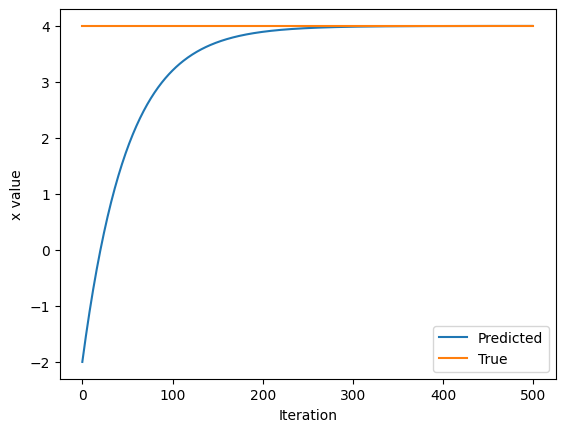

In [78]:
### Function minimization with automatic differentiation and SGD ###

# Initialize a random value for our initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []
# Define the target value
x_f = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss, 
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
  with tf.GradientTape() as tape:
    '''TODO: define the loss as described above'''
    loss = (x-x_f)*(x-x_f)

  # loss minimization using gradient tape
  grad = tape.gradient(loss, x) # compute the derivative of the loss with respect to x
  new_x = x - learning_rate*grad # sgd update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
